# Geospatial Analysis of NFL Game Outcomes and Environmental Factors

## Objective:

### Analyze how various geospatial and environmental factors, such as game location, stadium type, and weather conditions, influence the outcomes of NFL games. By examining these variables, we aim to identify patterns and correlations that can provide insights into team performance, game outcomes, and the impact of environmental conditions on the game.

In [4]:
# Import Libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [5]:
# Create file path
path = r'C:\Users\gre60\OneDrive\CareerFoundry Data Analytics Program\Data Immersion\Achievement 6\NFL Final Project 2'

In [6]:
# Import NFL Games csv
nfl_games = pd.read_csv(os.path.join(path, 'games.csv'))

In [7]:
# Check dimensions
nfl_games.shape

(6978, 46)

In [8]:
# Columns list
nfl_games.columns.to_list()

['game_id',
 'season',
 'game_type',
 'week',
 'gameday',
 'weekday',
 'gametime',
 'away_team',
 'away_score',
 'home_team',
 'home_score',
 'location',
 'result',
 'total',
 'overtime',
 'old_game_id',
 'gsis',
 'nfl_detail_id',
 'pfr',
 'pff',
 'espn',
 'ftn',
 'away_rest',
 'home_rest',
 'away_moneyline',
 'home_moneyline',
 'spread_line',
 'away_spread_odds',
 'home_spread_odds',
 'total_line',
 'under_odds',
 'over_odds',
 'div_game',
 'roof',
 'surface',
 'temp',
 'wind',
 'away_qb_id',
 'home_qb_id',
 'away_qb_name',
 'home_qb_name',
 'away_coach',
 'home_coach',
 'referee',
 'stadium_id',
 'stadium']

In [9]:
# Preview of data
nfl_games.head()

,game_id,season,game_type,week,gameday,weekday,gametime,away_team,away_score,home_team,...,wind,away_qb_id,home_qb_id,away_qb_name,home_qb_name,away_coach,home_coach,referee,stadium_id,stadium
0,1999_01_MIN_ATL,1999,REG,1,9/12/1999,Sunday,NaN,MIN,17.0,ATL,...,NaN,00-0003761,00-0002876,Randall Cunningham,Chris Chandler,Dennis Green,Dan Reeves,Gerry Austin,ATL00,Georgia Dome
1,1999_01_KC_CHI,1999,REG,1,9/12/1999,Sunday,NaN,KC,17.0,CHI,...,12.0,00-0006300,00-0010560,Elvis Grbac,Shane Matthews,Gunther Cunningham,Dick Jauron,Phil Luckett,CHI98,Soldier Field
2,1999_01_PIT_CLE,1999,REG,1,9/12/1999,Sunday,NaN,PIT,43.0,CLE,...,12.0,00-0015700,00-0004230,Kordell Stewart,Ty Detmer,Bill Cowher,Chris Palmer,Bob McElwee,CLE00,Cleveland Browns Stadium
3,1999_01_OAK_GB,1999,REG,1,9/12/1999,Sunday,NaN,OAK,24.0,GB,...,10.0,00-0005741,00-0005106,Rich Gannon,Brett Favre,Jon Gruden,Ray Rhodes,Tony Corrente,GNB00,Lambeau Field
4,1999_01_BUF_IND,1999,REG,1,9/12/1999,Sunday,NaN,BUF,14.0,IND,...,NaN,00-0005363,00-0010346,Doug Flutie,Peyton Manning,Wade Phillips,Jim Mora,Ron Blum,IND99,RCA Dome


#### Data Clean NFL games data

In [11]:
# Get rid of unnecessary columns for analysis
nfl_games = nfl_games.drop(['away_qb_id','home_qb_id','away_qb_name','home_qb_name','away_coach','home_coach', 'referee',  'under_odds',
                             'over_odds', 'away_spread_odds', 'home_spread_odds', 'away_moneyline', 'home_moneyline', 'old_game_id',
                             'gsis', 'nfl_detail_id', 'pfr', 'pff', 'espn', 'ftn'], axis=1)

In [12]:
nfl_games.columns.to_list()

['game_id',
 'season',
 'game_type',
 'week',
 'gameday',
 'weekday',
 'gametime',
 'away_team',
 'away_score',
 'home_team',
 'home_score',
 'location',
 'result',
 'total',
 'overtime',
 'away_rest',
 'home_rest',
 'spread_line',
 'total_line',
 'div_game',
 'roof',
 'surface',
 'temp',
 'wind',
 'stadium_id',
 'stadium']

In [13]:
# Check dimensions
nfl_games.shape

(6978, 26)

In [14]:
nfl_games.head()

,game_id,season,game_type,week,gameday,weekday,gametime,away_team,away_score,home_team,...,home_rest,spread_line,total_line,div_game,roof,surface,temp,wind,stadium_id,stadium
0,1999_01_MIN_ATL,1999,REG,1,9/12/1999,Sunday,NaN,MIN,17.0,ATL,...,7,-4.0,49.0,0,dome,astroturf,NaN,NaN,ATL00,Georgia Dome
1,1999_01_KC_CHI,1999,REG,1,9/12/1999,Sunday,NaN,KC,17.0,CHI,...,7,-3.0,38.0,0,outdoors,grass,80.0,12.0,CHI98,Soldier Field
2,1999_01_PIT_CLE,1999,REG,1,9/12/1999,Sunday,NaN,PIT,43.0,CLE,...,7,-6.0,37.0,1,outdoors,grass,78.0,12.0,CLE00,Cleveland Browns Stadium
3,1999_01_OAK_GB,1999,REG,1,9/12/1999,Sunday,NaN,OAK,24.0,GB,...,7,9.0,43.0,0,outdoors,grass,67.0,10.0,GNB00,Lambeau Field
4,1999_01_BUF_IND,1999,REG,1,9/12/1999,Sunday,NaN,BUF,14.0,IND,...,7,-3.0,45.5,1,dome,astroturf,NaN,NaN,IND99,RCA Dome


In [15]:
# Rename total to actual_total; total_line to projected_total
nfl_games.rename(columns={'total': 'actual_total', 'total_line': 'projected_total'}, inplace=True)

In [16]:
nfl_games.columns.to_list()

['game_id',
 'season',
 'game_type',
 'week',
 'gameday',
 'weekday',
 'gametime',
 'away_team',
 'away_score',
 'home_team',
 'home_score',
 'location',
 'result',
 'actual_total',
 'overtime',
 'away_rest',
 'home_rest',
 'spread_line',
 'projected_total',
 'div_game',
 'roof',
 'surface',
 'temp',
 'wind',
 'stadium_id',
 'stadium']

In [17]:
# Rename result to actual_spread; spread_line to projected_spread 
nfl_games.rename(columns = {'result': 'actual_spread', 'spread_line': 'projected_spread'}, inplace=True)

In [18]:
nfl_games.columns.to_list()

['game_id',
 'season',
 'game_type',
 'week',
 'gameday',
 'weekday',
 'gametime',
 'away_team',
 'away_score',
 'home_team',
 'home_score',
 'location',
 'actual_spread',
 'actual_total',
 'overtime',
 'away_rest',
 'home_rest',
 'projected_spread',
 'projected_total',
 'div_game',
 'roof',
 'surface',
 'temp',
 'wind',
 'stadium_id',
 'stadium']

In [19]:
nfl_games['home_team'].value_counts()

home_team
NE     239
PHI    228
KC     228
GB     226
PIT    225
SEA    224
IND    223
DEN    221
NO     221
SF     221
TB     220
BAL    219
CHI    218
BUF    217
ATL    217
TEN    217
DAL    217
MIN    217
NYG    216
CAR    216
CIN    216
ARI    215
WAS    214
JAX    214
MIA    213
DET    212
NYJ    211
CLE    210
HOU    193
OAK    173
SD     149
STL    141
LA      79
LAC     66
LV      42
Name: count, dtype: int64

In [20]:
# Create home_market

nfl_games.loc[nfl_games['home_team'] == 'NE', 'home_market'] = 'New England'
nfl_games.loc[nfl_games['home_team'] == 'PHI', 'home_market'] = 'Philadelphia'    
nfl_games.loc[nfl_games['home_team'] == 'KC', 'home_market'] = 'Kansas City'
nfl_games.loc[nfl_games['home_team'] == 'GB', 'home_market'] = 'Green Bay'
nfl_games.loc[nfl_games['home_team'] == 'PIT', 'home_market'] = 'Pittsburgh'
nfl_games.loc[nfl_games['home_team'] == 'SEA', 'home_market'] = 'Seattle' 
nfl_games.loc[nfl_games['home_team'] == 'IND', 'home_market'] = 'Indianapolis'
nfl_games.loc[nfl_games['home_team'] == 'DEN', 'home_market'] = 'Denver'
nfl_games.loc[nfl_games['home_team'] == 'NO', 'home_market'] = 'New Orleans' 
nfl_games.loc[nfl_games['home_team'] == 'SF', 'home_market'] = 'San Francisco'
nfl_games.loc[nfl_games['home_team'] == 'TB', 'home_market'] = 'Tampa Bay'
nfl_games.loc[nfl_games['home_team'] == 'BAL', 'home_market'] = 'Baltimore'
nfl_games.loc[nfl_games['home_team'] == 'CHI', 'home_market'] = 'Chicago'
nfl_games.loc[nfl_games['home_team'] == 'BUF', 'home_market'] = 'Buffalo'
nfl_games.loc[nfl_games['home_team'] == 'ATL', 'home_market'] = 'Atlanta'
nfl_games.loc[nfl_games['home_team'] == 'TEN', 'home_market'] = 'Tennessee'
nfl_games.loc[nfl_games['home_team'] == 'DAL', 'home_market'] = 'Dallas'
nfl_games.loc[nfl_games['home_team'] == 'MIN', 'home_market'] = 'Minnesota'
nfl_games.loc[nfl_games['home_team'] == 'NYG', 'home_market'] = 'New York'  
nfl_games.loc[nfl_games['home_team'] == 'CAR', 'home_market'] = 'Carolina'
nfl_games.loc[nfl_games['home_team'] == 'CIN', 'home_market'] = 'Cincinnati'
nfl_games.loc[nfl_games['home_team'] == 'ARI', 'home_market'] = 'Arizona'
nfl_games.loc[nfl_games['home_team'] == 'WAS', 'home_market'] = 'Washington'
nfl_games.loc[nfl_games['home_team'] == 'JAX', 'home_market'] = 'Jacksonville'
nfl_games.loc[nfl_games['home_team'] == 'MIA', 'home_market'] = 'Miami'
nfl_games.loc[nfl_games['home_team'] == 'DET', 'home_market'] = 'Detroit'
nfl_games.loc[nfl_games['home_team'] == 'NYJ', 'home_market'] = 'New York'
nfl_games.loc[nfl_games['home_team'] == 'CLE', 'home_market'] = 'Cleaveland' 
nfl_games.loc[nfl_games['home_team'] == 'HOU', 'home_market'] = 'Houston'
nfl_games.loc[nfl_games['home_team'] == 'OAK', 'home_market'] = 'Oakland'
nfl_games.loc[nfl_games['home_team'] == 'SD', 'home_market'] = 'San Diego'
nfl_games.loc[nfl_games['home_team'] == 'STL', 'home_market'] = 'St Louis'
nfl_games.loc[nfl_games['home_team'] == 'LA', 'home_market'] = 'Los Angeles'
nfl_games.loc[nfl_games['home_team'] == 'LAC', 'home_market'] = 'Los Angeles'
nfl_games.loc[nfl_games['home_team'] == 'LV', 'home_market'] = 'Las Vegas'

In [21]:
# Create home_name

nfl_games.loc[nfl_games['home_team'] == 'NE', 'home_name'] = 'Patriots'
nfl_games.loc[nfl_games['home_team'] == 'PHI', 'home_name'] = 'Eagles'    
nfl_games.loc[nfl_games['home_team'] == 'KC', 'home_name'] = 'Chiefs'
nfl_games.loc[nfl_games['home_team'] == 'GB', 'home_name'] = 'Packers'
nfl_games.loc[nfl_games['home_team'] == 'PIT', 'home_name'] = 'Steelers'
nfl_games.loc[nfl_games['home_team'] == 'SEA', 'home_name'] = 'Seahawks' 
nfl_games.loc[nfl_games['home_team'] == 'IND', 'home_name'] = 'Colts'
nfl_games.loc[nfl_games['home_team'] == 'DEN', 'home_name'] = 'Broncos'
nfl_games.loc[nfl_games['home_team'] == 'NO', 'home_name'] = 'Saints' 
nfl_games.loc[nfl_games['home_team'] == 'SF', 'home_name'] = '49ers'
nfl_games.loc[nfl_games['home_team'] == 'TB', 'home_name'] = 'Buccaneers'
nfl_games.loc[nfl_games['home_team'] == 'BAL', 'home_name'] = 'Ravens'
nfl_games.loc[nfl_games['home_team'] == 'CHI', 'home_name'] = 'Bears'
nfl_games.loc[nfl_games['home_team'] == 'BUF', 'home_name'] = 'Bills'
nfl_games.loc[nfl_games['home_team'] == 'ATL', 'home_name'] = 'Falcons'
nfl_games.loc[nfl_games['home_team'] == 'TEN', 'home_name'] = 'Titans'
nfl_games.loc[nfl_games['home_team'] == 'DAL', 'home_name'] = 'Cowboys'
nfl_games.loc[nfl_games['home_team'] == 'MIN', 'home_name'] = 'Vikings'
nfl_games.loc[nfl_games['home_team'] == 'NYG', 'home_name'] = 'Giants'  
nfl_games.loc[nfl_games['home_team'] == 'CAR', 'home_name'] = 'Panthers'
nfl_games.loc[nfl_games['home_team'] == 'CIN', 'home_name'] = 'Bengals'
nfl_games.loc[nfl_games['home_team'] == 'ARI', 'home_name'] = 'Cardinals'
nfl_games.loc[nfl_games['home_team'] == 'WAS', 'home_name'] = 'Commanders'
nfl_games.loc[nfl_games['home_team'] == 'JAX', 'home_name'] = 'Jaguars'
nfl_games.loc[nfl_games['home_team'] == 'MIA', 'home_name'] = 'Dolphins'
nfl_games.loc[nfl_games['home_team'] == 'DET', 'home_name'] = 'Lions'
nfl_games.loc[nfl_games['home_team'] == 'NYJ', 'home_name'] = 'Jets'
nfl_games.loc[nfl_games['home_team'] == 'CLE', 'home_name'] = 'Browns' 
nfl_games.loc[nfl_games['home_team'] == 'HOU', 'home_name'] = 'Texans'
nfl_games.loc[nfl_games['home_team'] == 'OAK', 'home_name'] = 'Raiders'
nfl_games.loc[nfl_games['home_team'] == 'SD', 'home_name'] = 'Chargers'
nfl_games.loc[nfl_games['home_team'] == 'STL', 'home_name'] = 'Rams'
nfl_games.loc[nfl_games['home_team'] == 'LA', 'home_name'] = 'Rams'
nfl_games.loc[nfl_games['home_team'] == 'LAC', 'home_name'] = 'Chargers'
nfl_games.loc[nfl_games['home_team'] == 'LV', 'home_name'] = 'Raiders'

In [22]:
nfl_games.head()

,game_id,season,game_type,week,gameday,weekday,gametime,away_team,away_score,home_team,...,projected_total,div_game,roof,surface,temp,wind,stadium_id,stadium,home_market,home_name
0,1999_01_MIN_ATL,1999,REG,1,9/12/1999,Sunday,NaN,MIN,17.0,ATL,...,49.0,0,dome,astroturf,NaN,NaN,ATL00,Georgia Dome,Atlanta,Falcons
1,1999_01_KC_CHI,1999,REG,1,9/12/1999,Sunday,NaN,KC,17.0,CHI,...,38.0,0,outdoors,grass,80.0,12.0,CHI98,Soldier Field,Chicago,Bears
2,1999_01_PIT_CLE,1999,REG,1,9/12/1999,Sunday,NaN,PIT,43.0,CLE,...,37.0,1,outdoors,grass,78.0,12.0,CLE00,Cleveland Browns Stadium,Cleaveland,Browns
3,1999_01_OAK_GB,1999,REG,1,9/12/1999,Sunday,NaN,OAK,24.0,GB,...,43.0,0,outdoors,grass,67.0,10.0,GNB00,Lambeau Field,Green Bay,Packers
4,1999_01_BUF_IND,1999,REG,1,9/12/1999,Sunday,NaN,BUF,14.0,IND,...,45.5,1,dome,astroturf,NaN,NaN,IND99,RCA Dome,Indianapolis,Colts


In [23]:
# Create away_market

nfl_games.loc[nfl_games['away_team'] == 'NE', 'away_market'] = 'New England'
nfl_games.loc[nfl_games['away_team'] == 'PHI', 'away_market'] = 'Philadelphia'    
nfl_games.loc[nfl_games['away_team'] == 'KC', 'away_market'] = 'Kansas City'
nfl_games.loc[nfl_games['away_team'] == 'GB', 'away_market'] = 'Green Bay'
nfl_games.loc[nfl_games['away_team'] == 'PIT', 'away_market'] = 'Pittsburgh'
nfl_games.loc[nfl_games['away_team'] == 'SEA', 'away_market'] = 'Seattle' 
nfl_games.loc[nfl_games['away_team'] == 'IND', 'away_market'] = 'Indianapolis'
nfl_games.loc[nfl_games['away_team'] == 'DEN', 'away_market'] = 'Denver'
nfl_games.loc[nfl_games['away_team'] == 'NO', 'away_market'] = 'New Orleans' 
nfl_games.loc[nfl_games['away_team'] == 'SF', 'away_market'] = 'San Francisco'
nfl_games.loc[nfl_games['away_team'] == 'TB', 'away_market'] = 'Tampa Bay'
nfl_games.loc[nfl_games['away_team'] == 'BAL', 'away_market'] = 'Baltimore'
nfl_games.loc[nfl_games['away_team'] == 'CHI', 'away_market'] = 'Chicago'
nfl_games.loc[nfl_games['away_team'] == 'BUF', 'away_market'] = 'Buffalo'
nfl_games.loc[nfl_games['away_team'] == 'ATL', 'away_market'] = 'Atlanta'
nfl_games.loc[nfl_games['away_team'] == 'TEN', 'away_market'] = 'Tennessee'
nfl_games.loc[nfl_games['away_team'] == 'DAL', 'away_market'] = 'Dallas'
nfl_games.loc[nfl_games['away_team'] == 'MIN', 'away_market'] = 'Minnesota'
nfl_games.loc[nfl_games['away_team'] == 'NYG', 'away_market'] = 'New York'  
nfl_games.loc[nfl_games['away_team'] == 'CAR', 'away_market'] = 'Carolina'
nfl_games.loc[nfl_games['away_team'] == 'CIN', 'away_market'] = 'Cincinnati'
nfl_games.loc[nfl_games['away_team'] == 'ARI', 'away_market'] = 'Arizona'
nfl_games.loc[nfl_games['away_team'] == 'WAS', 'away_market'] = 'Washington'
nfl_games.loc[nfl_games['away_team'] == 'JAX', 'away_market'] = 'Jacksonville'
nfl_games.loc[nfl_games['away_team'] == 'MIA', 'away_market'] = 'Miami'
nfl_games.loc[nfl_games['away_team'] == 'DET', 'away_market'] = 'Detroit'
nfl_games.loc[nfl_games['away_team'] == 'NYJ', 'away_market'] = 'New York'
nfl_games.loc[nfl_games['away_team'] == 'CLE', 'away_market'] = 'Cleaveland' 
nfl_games.loc[nfl_games['away_team'] == 'HOU', 'away_market'] = 'Houston'
nfl_games.loc[nfl_games['away_team'] == 'OAK', 'away_market'] = 'Oakland'
nfl_games.loc[nfl_games['away_team'] == 'SD', 'away_market'] = 'San Diego'
nfl_games.loc[nfl_games['away_team'] == 'STL', 'away_market'] = 'St Louis'
nfl_games.loc[nfl_games['away_team'] == 'LA', 'away_market'] = 'Los Angeles'
nfl_games.loc[nfl_games['away_team'] == 'LAC', 'away_market'] = 'Los Angeles'
nfl_games.loc[nfl_games['away_team'] == 'LV', 'away_market'] = 'Las Vegas'

In [24]:
# Create away_name

nfl_games.loc[nfl_games['away_team'] == 'NE', 'away_name'] = 'Patriots'
nfl_games.loc[nfl_games['away_team'] == 'PHI', 'away_name'] = 'Eagles'    
nfl_games.loc[nfl_games['away_team'] == 'KC', 'away_name'] = 'Chiefs'
nfl_games.loc[nfl_games['away_team'] == 'GB', 'away_name'] = 'Packers'
nfl_games.loc[nfl_games['away_team'] == 'PIT', 'away_name'] = 'Steelers'
nfl_games.loc[nfl_games['away_team'] == 'SEA', 'away_name'] = 'Seahawks' 
nfl_games.loc[nfl_games['away_team'] == 'IND', 'away_name'] = 'Colts'
nfl_games.loc[nfl_games['away_team'] == 'DEN', 'away_name'] = 'Broncos'
nfl_games.loc[nfl_games['away_team'] == 'NO', 'away_name'] = 'Saints' 
nfl_games.loc[nfl_games['away_team'] == 'SF', 'away_name'] = '49ers'
nfl_games.loc[nfl_games['away_team'] == 'TB', 'away_name'] = 'Buccaneers'
nfl_games.loc[nfl_games['away_team'] == 'BAL', 'away_name'] = 'Ravens'
nfl_games.loc[nfl_games['away_team'] == 'CHI', 'away_name'] = 'Bears'
nfl_games.loc[nfl_games['away_team'] == 'BUF', 'away_name'] = 'Bills'
nfl_games.loc[nfl_games['away_team'] == 'ATL', 'away_name'] = 'Falcons'
nfl_games.loc[nfl_games['away_team'] == 'TEN', 'away_name'] = 'Titans'
nfl_games.loc[nfl_games['away_team'] == 'DAL', 'away_name'] = 'Cowboys'
nfl_games.loc[nfl_games['away_team'] == 'MIN', 'away_name'] = 'Vikings'
nfl_games.loc[nfl_games['away_team'] == 'NYG', 'away_name'] = 'Giants'  
nfl_games.loc[nfl_games['away_team'] == 'CAR', 'away_name'] = 'Panthers'
nfl_games.loc[nfl_games['away_team'] == 'CIN', 'away_name'] = 'Bengals'
nfl_games.loc[nfl_games['away_team'] == 'ARI', 'away_name'] = 'Cardinals'
nfl_games.loc[nfl_games['away_team'] == 'WAS', 'away_name'] = 'Commanders'
nfl_games.loc[nfl_games['away_team'] == 'JAX', 'away_name'] = 'Jaguars'
nfl_games.loc[nfl_games['away_team'] == 'MIA', 'away_name'] = 'Dolphins'
nfl_games.loc[nfl_games['away_team'] == 'DET', 'away_name'] = 'Lions'
nfl_games.loc[nfl_games['away_team'] == 'NYJ', 'away_name'] = 'Jets'
nfl_games.loc[nfl_games['away_team'] == 'CLE', 'away_name'] = 'Browns' 
nfl_games.loc[nfl_games['away_team'] == 'HOU', 'away_name'] = 'Texans'
nfl_games.loc[nfl_games['away_team'] == 'OAK', 'away_name'] = 'Raiders'
nfl_games.loc[nfl_games['away_team'] == 'SD', 'away_name'] = 'Chargers'
nfl_games.loc[nfl_games['away_team'] == 'STL', 'away_name'] = 'Rams'
nfl_games.loc[nfl_games['away_team'] == 'LA', 'away_name'] = 'Rams'
nfl_games.loc[nfl_games['away_team'] == 'LAC', 'away_name'] = 'Chargers'
nfl_games.loc[nfl_games['away_team'] == 'LV', 'away_name'] = 'Raiders'

In [25]:
nfl_games.head()

,game_id,season,game_type,week,gameday,weekday,gametime,away_team,away_score,home_team,...,roof,surface,temp,wind,stadium_id,stadium,home_market,home_name,away_market,away_name
0,1999_01_MIN_ATL,1999,REG,1,9/12/1999,Sunday,NaN,MIN,17.0,ATL,...,dome,astroturf,NaN,NaN,ATL00,Georgia Dome,Atlanta,Falcons,Minnesota,Vikings
1,1999_01_KC_CHI,1999,REG,1,9/12/1999,Sunday,NaN,KC,17.0,CHI,...,outdoors,grass,80.0,12.0,CHI98,Soldier Field,Chicago,Bears,Kansas City,Chiefs
2,1999_01_PIT_CLE,1999,REG,1,9/12/1999,Sunday,NaN,PIT,43.0,CLE,...,outdoors,grass,78.0,12.0,CLE00,Cleveland Browns Stadium,Cleaveland,Browns,Pittsburgh,Steelers
3,1999_01_OAK_GB,1999,REG,1,9/12/1999,Sunday,NaN,OAK,24.0,GB,...,outdoors,grass,67.0,10.0,GNB00,Lambeau Field,Green Bay,Packers,Oakland,Raiders
4,1999_01_BUF_IND,1999,REG,1,9/12/1999,Sunday,NaN,BUF,14.0,IND,...,dome,astroturf,NaN,NaN,IND99,RCA Dome,Indianapolis,Colts,Buffalo,Bills


### Check for Missing Values

In [27]:
# Check for missing values
nfl_games.isnull().sum()

game_id                0
season                 0
game_type              0
week                   0
gameday                0
weekday                0
gametime             259
away_team              0
away_score           272
home_team              0
home_score           272
location               0
actual_spread        272
actual_total         272
overtime             272
away_rest              0
home_rest              0
projected_spread     256
projected_total      256
div_game               0
roof                   0
surface               41
temp                2144
wind                2144
stadium_id             0
stadium                0
home_market            0
home_name              0
away_market            0
away_name              0
dtype: int64

#### I'm not addressing missing values to keep the data authentic and because the spread total data is needed for analysis. Not addressing the missing values preserves the integrity.

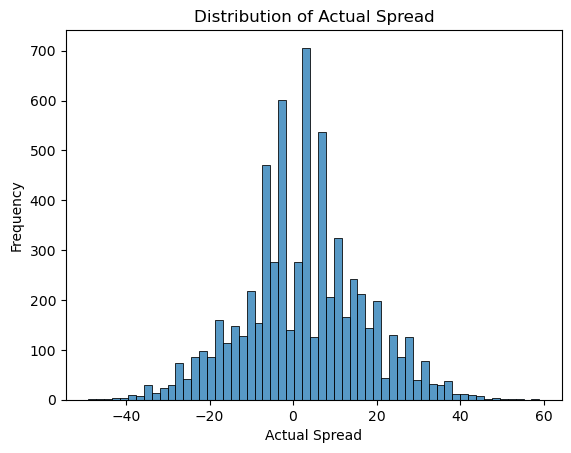

In [29]:
# Create histogram to look at distribution of actual spread
sns.histplot(nfl_games['actual_spread'])
plt.title('Distribution of Actual Spread')
plt.xlabel('Actual Spread')
plt.ylabel('Frequency')
plt.show()

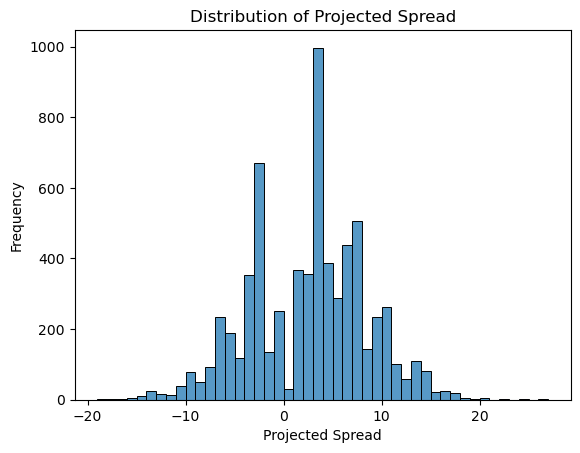

In [30]:
# Create histogram to look at distribution of projected spread
sns.histplot(nfl_games['projected_spread'])
plt.title('Distribution of Projected Spread')
plt.xlabel('Projected Spread')
plt.ylabel('Frequency')
plt.show()

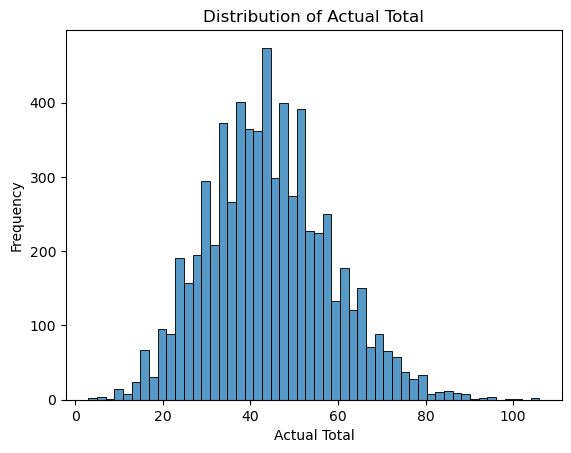

In [31]:
# Create histogram to look at distribution of actual total
sns.histplot(nfl_games['actual_total'])
plt.title('Distribution of Actual Total')
plt.xlabel('Actual Total')
plt.ylabel('Frequency')
plt.show()

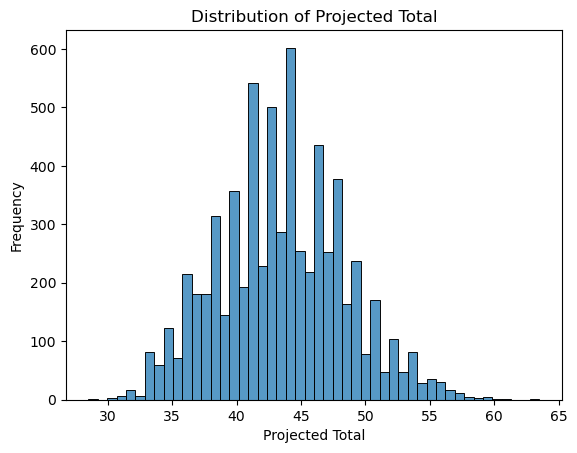

In [32]:
# Create histogram to look at distribution of projected total
sns.histplot(nfl_games['projected_total'])
plt.title('Distribution of Projected Total')
plt.xlabel('Projected Total')
plt.ylabel('Frequency')
plt.show()

### Check for duplicates

In [34]:
duplicate_rows = nfl_games[nfl_games.duplicated()]
duplicate_rows

,game_id,season,game_type,week,gameday,weekday,gametime,away_team,away_score,home_team,...,roof,surface,temp,wind,stadium_id,stadium,home_market,home_name,away_market,away_name


### Check for mixed types

In [36]:
### Check for mixed types
for col in nfl_games.columns.tolist():
  weird = (nfl_games[[col]].map(type) != nfl_games[[col]].iloc[0].apply(type)).any(axis = 1)
  if len (nfl_games[weird]) > 0:
    print (col)

gametime
surface


In [37]:
nfl_games['gametime'].value_counts(dropna=False)

gametime
13:00    3525
16:05     601
16:15     545
16:25     528
20:30     357
20:20     309
NaN       259
20:15     246
9:00      102
20:25      88
16:30      85
20:00      35
12:30      34
18:30      31
9:30       24
15:00      19
16:40      16
16:35      15
13:05      15
17:00      14
19:00      13
20:40      13
15:05      11
16:00       9
18:40       9
13:30       8
19:10       7
22:15       7
19:30       5
21:30       5
22:20       5
19:15       4
18:25       3
12:00       3
16:45       2
14:00       2
18:18       2
18:31       2
15:15       2
21:00       2
15:40       1
20:05       1
19:05       1
22:10       1
18:41       1
16:36       1
21:20       1
18:50       1
20:10       1
23:30       1
19:20       1
21:15       1
18:32       1
22:25       1
18:45       1
16:50       1
Name: count, dtype: int64

In [38]:
nfl_games['surface'].value_counts(dropna=False)

surface
grass         3881
fieldturf     1703
astroturf      475
sportturf      312
matrixturf     195
astroplay      118
a_turf          99
grass           93
dessograss      61
NaN             41
Name: count, dtype: int64

#### The mixed types from the gametime and surface columns are because of NaN's values. 

In [40]:
nfl_games.columns.to_list()

['game_id',
 'season',
 'game_type',
 'week',
 'gameday',
 'weekday',
 'gametime',
 'away_team',
 'away_score',
 'home_team',
 'home_score',
 'location',
 'actual_spread',
 'actual_total',
 'overtime',
 'away_rest',
 'home_rest',
 'projected_spread',
 'projected_total',
 'div_game',
 'roof',
 'surface',
 'temp',
 'wind',
 'stadium_id',
 'stadium',
 'home_market',
 'home_name',
 'away_market',
 'away_name']

In [41]:
# Create division groups
nfc_north = ['Lions', 'Bears', 'Packers', 'Vikings']
nfc_south = ['Saints', 'Buccaneers', 'Falcons', 'Panthers']
nfc_east = ['Giants', 'Cowboys', 'Eagles', 'Commanders']
nfc_west = ['49ers', 'Seahawks', 'Cardinals', 'Rams']
afc_north = ['Bengals', 'Browns', 'Steelers', 'Ravens']
afc_south = ['Colts', 'Texans', 'Titans', 'Jaguars']
afc_east = ['Patriots', 'Jets', 'Dolphins', 'Bills']
afc_west = ['Chiefs', 'Chargers', 'Raiders', 'Broncos']

In [42]:
# Create home_division colulmn
nfl_games.loc[nfl_games['home_name'].isin(nfc_north), 'home_division'] = 'NFC North'
nfl_games.loc[nfl_games['home_name'].isin(nfc_south), 'home_division'] = 'NFC South'
nfl_games.loc[nfl_games['home_name'].isin(nfc_east), 'home_division'] = 'NFC East'
nfl_games.loc[nfl_games['home_name'].isin(nfc_west), 'home_division'] = 'NFC West'
nfl_games.loc[nfl_games['home_name'].isin(afc_north), 'home_division'] = 'AFC North'
nfl_games.loc[nfl_games['home_name'].isin(afc_south), 'home_division'] = 'AFC South'
nfl_games.loc[nfl_games['home_name'].isin(afc_east), 'home_division'] = 'AFC East'
nfl_games.loc[nfl_games['home_name'].isin(afc_west), 'home_division'] = 'AFC West'

In [43]:
# Create away_division colulmn
nfl_games.loc[nfl_games['away_name'].isin(nfc_north), 'away_division'] = 'NFC North'
nfl_games.loc[nfl_games['away_name'].isin(nfc_south), 'away_division'] = 'NFC South'
nfl_games.loc[nfl_games['away_name'].isin(nfc_east), 'away_division'] = 'NFC East'
nfl_games.loc[nfl_games['away_name'].isin(nfc_west), 'away_division'] = 'NFC West'
nfl_games.loc[nfl_games['away_name'].isin(afc_north), 'away_division'] = 'AFC North'
nfl_games.loc[nfl_games['away_name'].isin(afc_south), 'away_division'] = 'AFC South'
nfl_games.loc[nfl_games['away_name'].isin(afc_east), 'away_division'] = 'AFC East'
nfl_games.loc[nfl_games['away_name'].isin(afc_west), 'away_division'] = 'AFC West'

In [44]:
nfl_games.head()

,game_id,season,game_type,week,gameday,weekday,gametime,away_team,away_score,home_team,...,temp,wind,stadium_id,stadium,home_market,home_name,away_market,away_name,home_division,away_division
0,1999_01_MIN_ATL,1999,REG,1,9/12/1999,Sunday,NaN,MIN,17.0,ATL,...,NaN,NaN,ATL00,Georgia Dome,Atlanta,Falcons,Minnesota,Vikings,NFC South,NFC North
1,1999_01_KC_CHI,1999,REG,1,9/12/1999,Sunday,NaN,KC,17.0,CHI,...,80.0,12.0,CHI98,Soldier Field,Chicago,Bears,Kansas City,Chiefs,NFC North,AFC West
2,1999_01_PIT_CLE,1999,REG,1,9/12/1999,Sunday,NaN,PIT,43.0,CLE,...,78.0,12.0,CLE00,Cleveland Browns Stadium,Cleaveland,Browns,Pittsburgh,Steelers,AFC North,AFC North
3,1999_01_OAK_GB,1999,REG,1,9/12/1999,Sunday,NaN,OAK,24.0,GB,...,67.0,10.0,GNB00,Lambeau Field,Green Bay,Packers,Oakland,Raiders,NFC North,AFC West
4,1999_01_BUF_IND,1999,REG,1,9/12/1999,Sunday,NaN,BUF,14.0,IND,...,NaN,NaN,IND99,RCA Dome,Indianapolis,Colts,Buffalo,Bills,AFC South,AFC East


In [86]:
nfl_games.columns.to_list()

['game_id',
 'season',
 'game_type',
 'week',
 'gameday',
 'weekday',
 'gametime',
 'away_team',
 'away_score',
 'home_team',
 'home_score',
 'location',
 'actual_spread',
 'actual_total',
 'overtime',
 'away_rest',
 'home_rest',
 'projected_spread',
 'projected_total',
 'div_game',
 'roof',
 'surface',
 'temp',
 'wind',
 'stadium_id',
 'stadium',
 'home_market',
 'home_name',
 'away_market',
 'away_name',
 'home_division',
 'away_division']

### Export Dataframe

In [89]:
nfl_games.to_csv(os.path.join(path, 'nfl_spread_analysis.csv'))